In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas and seaborn display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("Libraries loaded. Ready to roll.")


Libraries loaded. Ready to roll.


In [5]:
import os
import pandas as pd

# Path to your data file (you can change this if needed)
data_path = "data/cloud_labels.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(data_path)

# Show the first few rows
print("Data preview:")
df.head()


Data preview:


,image_id,cloud_type
0,img_001.jpg,cumulus
1,img_002.jpg,cirrus
2,img_003.jpg,stratus


In [6]:
import os
import pandas as pd

# Create the data directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Sample data
dummy_data = {
    "image_id": ["img_001.jpg", "img_002.jpg", "img_003.jpg"],
    "cloud_type": ["cumulus", "cirrus", "stratus"]
}

# Convert to DataFrame and save as CSV
df_dummy = pd.DataFrame(dummy_data)
df_dummy.to_csv("data/cloud_labels.csv", index=False)

print("Dummy cloud_labels.csv file created.")



Dummy cloud_labels.csv file created.


In [7]:
import pandas as pd

data_path = "data/cloud_labels.csv"
df = pd.read_csv(data_path)

print("Data preview:")
df.head()


Data preview:


,image_id,cloud_type
0,img_001.jpg,cumulus
1,img_002.jpg,cirrus
2,img_003.jpg,stratus


In [8]:
from sklearn.preprocessing import LabelEncoder

# Create and fit the encoder
le = LabelEncoder()
df["label"] = le.fit_transform(df["cloud_type"])

# View the updated DataFrame
print("Encoded labels preview:")
df


Encoded labels preview:


,image_id,cloud_type,label
0,img_001.jpg,cumulus,1
1,img_002.jpg,cirrus,0
2,img_003.jpg,stratus,2


In [9]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\trist\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
X = df[["image_id"]]  # we'll fix this in a second – image_id isn't useful
y = df["label"]

# For now, replace image_id with numbers (just for demo)
X = pd.DataFrame([0, 1, 2], columns=["feature"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [11]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# View the predictions
print("Predictions on test set:", y_pred.tolist())


Predictions on test set: [0]


In [12]:
from sklearn.metrics import accuracy_score

# Check how accurate the model is
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")


Model accuracy: 0.00


In [13]:
# Simulated image features (3 features per image)
import numpy as np

X = pd.DataFrame([
    [0.3, 0.6, 0.9],  # img_001.jpg
    [0.1, 0.2, 0.4],  # img_002.jpg
    [0.8, 0.7, 0.5]   # img_003.jpg
], columns=["brightness", "density", "roughness"])


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Predictions on test set:", y_pred.tolist())


Predictions on test set: [2]


In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.0


In [17]:
# Simulate a slightly larger dataset (10 images, 3 features each)
X = pd.DataFrame([
    [0.1, 0.2, 0.3],
    [0.4, 0.5, 0.6],
    [0.7, 0.8, 0.9],
    [0.2, 0.3, 0.1],
    [0.6, 0.5, 0.4],
    [0.9, 0.8, 0.7],
    [0.3, 0.1, 0.2],
    [0.5, 0.7, 0.6],
    [0.8, 0.6, 0.9],
    [0.2, 0.4, 0.3]
], columns=["brightness", "density", "roughness"])

# Fake labels (0=cirrus, 1=cumulus, 2=stratus)
y = pd.Series([0, 1, 2, 0, 1, 2, 0, 1, 2, 0])


In [18]:
import numpy as np

X = pd.DataFrame({
    "brightness": [70, 40, 60],   # Simulated brightness (0–100)
    "width": [1920, 1280, 1600]   # Simulated image width in pixels
})


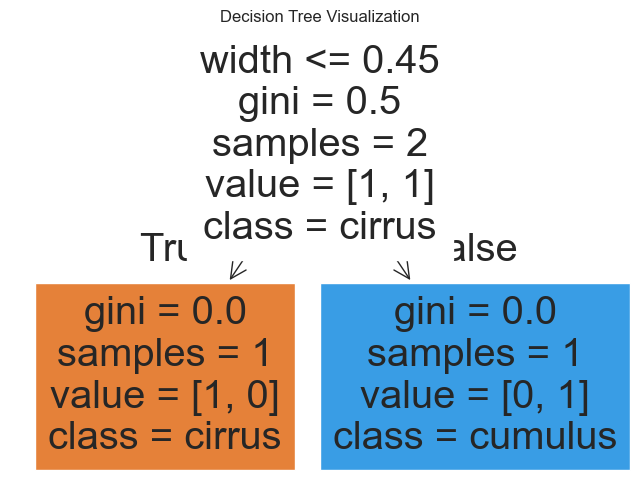

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plot_tree(model, feature_names=X.columns, class_names=["cirrus", "cumulus", "stratus"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [20]:
df = pd.read_csv("data/query_data.csv")
df.head()



,AttackerIP,EventID,Activity,DestinationHostName,FailureCount
0,137.97.249.22,4625,4625 - An account failed to log on.,windows-vm,49
1,103.199.211.245,4625,4625 - An account failed to log on.,windows-vm,514
2,20.5.50.76,4625,4625 - An account failed to log on.,windows-vm,64
3,81.214.22.37,4625,4625 - An account failed to log on.,windows-vm,296
4,103.147.33.53,4625,4625 - An account failed to log on.,windows-vm,292


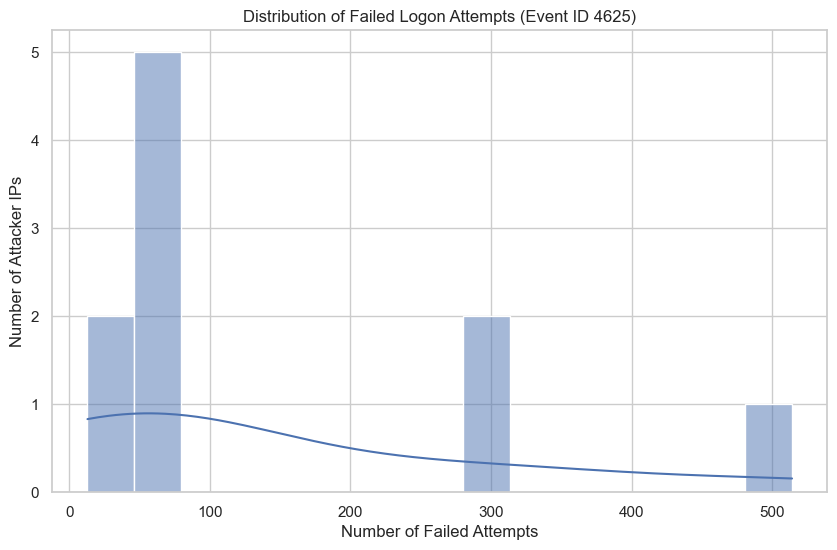

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of failure counts
plt.figure(figsize=(10, 6))
sns.histplot(df['FailureCount'], bins=15, kde=True)
plt.title("Distribution of Failed Logon Attempts (Event ID 4625)")
plt.xlabel("Number of Failed Attempts")
plt.ylabel("Number of Attacker IPs")
plt.grid(True)
plt.show()


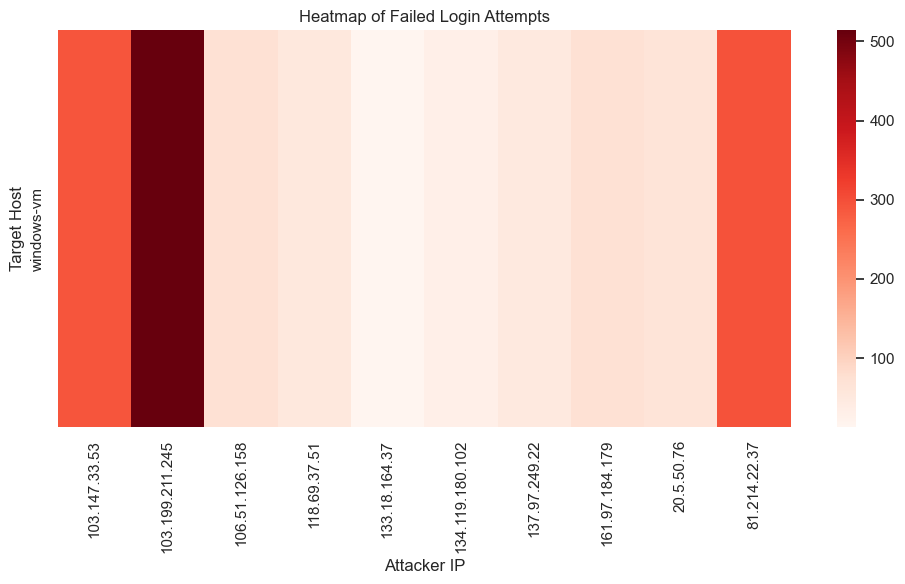

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.pivot_table(index='DestinationHostName', columns='AttackerIP', values='FailureCount', fill_value=0), cmap='Reds')
plt.title("Heatmap of Failed Login Attempts")
plt.ylabel("Target Host")
plt.xlabel("Attacker IP")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [23]:
# Label data: High risk if more than 100 failures
df['Label'] = df['FailureCount'].apply(lambda x: 1 if x > 100 else 0)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df[['FailureCount']]  # Features
y = df['Label']           # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("Model Accuracy:", model.score(X_test, y_test))


Model Accuracy: 1.0


In [24]:
#df = pd.read_csv("notebooks/data/query_data.csv")
#df = pd.read_csv("./notebooks/data/query_data.csv")
#df = pd.read_csv("Documents/GitHub/rakuten-ML-cloud-cover/notebooks/data/query_data.csv")
import os
print("Current Directory:", os.getcwd())
print("Files here:", os.listdir())


Current Directory: c:\Users\trist\Documents\GitHub\rakuten-ML-cloud-cover\notebooks
Files here: ['archive', 'data', 'rakuten-ml-prototype.ipynb']


In [25]:
X = df[['FailureCount']]     # Features
y = df['Label']              # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("Model Accuracy:", model.score(X_test, y_test))


Model Accuracy: 1.0


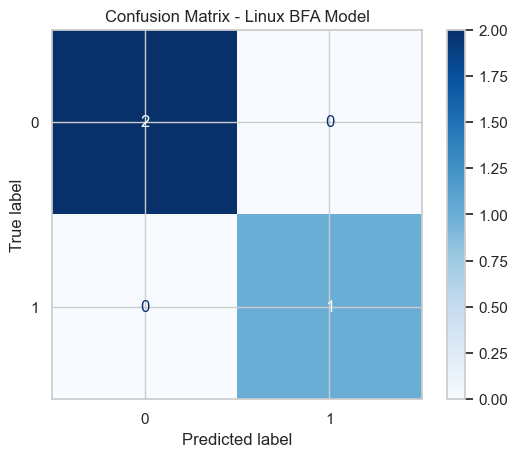

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Linux BFA Model")
plt.show()


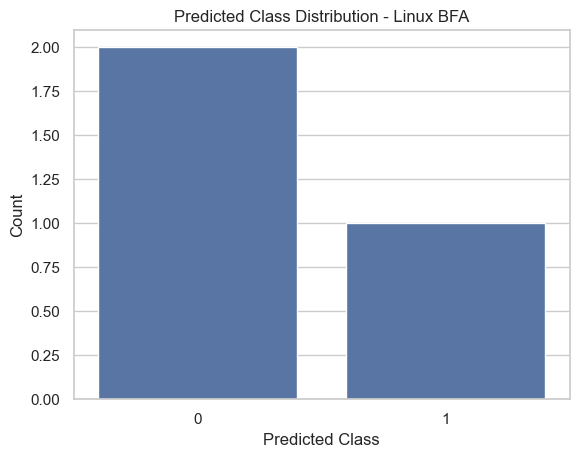

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: show how many of each predicted label
sns.countplot(x=y_pred)
plt.title("Predicted Class Distribution - Linux BFA")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()


In [28]:
import pandas as pd

df = pd.read_csv("CloudCover.csv")
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'CloudCover.csv'

In [ ]:
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())


Shape: (10, 5)
Columns: Index(['TimeGenerated', 'Computer', 'Account', 'LogonType', 'FailureReason'], dtype='object')
                  TimeGenerated    Computer                Account  LogonType  \
0  2025-06-21T03:14:49.2468977Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   
1  2025-06-21T03:14:49.8640175Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   
2  2025-06-21T03:14:50.4611867Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   
3  2025-06-21T03:14:51.0436188Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   
4  2025-06-21T03:14:51.6404716Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   

  FailureReason  
0        %%2313  
1        %%2313  
2        %%2313  
3        %%2313  
4        %%2313  


In [ ]:
print(df.dtypes)
print(df['TimeGenerated'].unique())


TimeGenerated    object
Computer         object
Account          object
LogonType         int64
FailureReason    object
dtype: object
['2025-06-21T03:14:49.2468977Z' '2025-06-21T03:14:49.8640175Z'
 '2025-06-21T03:14:50.4611867Z' '2025-06-21T03:14:51.0436188Z'
 '2025-06-21T03:14:51.6404716Z' '2025-06-21T03:14:52.2226498Z'
 '2025-06-21T03:14:52.8113686Z' '2025-06-21T03:14:53.3935902Z'
 '2025-06-21T03:14:53.9818925Z' '2025-06-21T03:14:54.5519282Z']


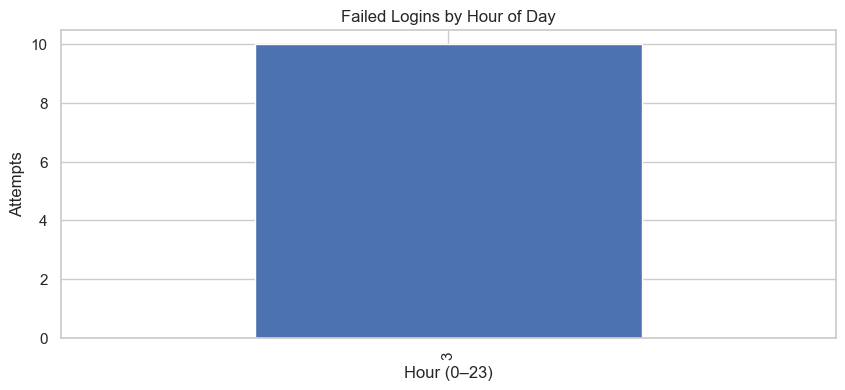

In [ ]:
import matplotlib.pyplot as plt

df['TimeGenerated'] = pd.to_datetime(df['TimeGenerated'], errors='coerce')
df['Hour'] = df['TimeGenerated'].dt.hour

df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))
plt.title('Failed Logins by Hour of Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Attempts')
plt.grid(True)
plt.show()


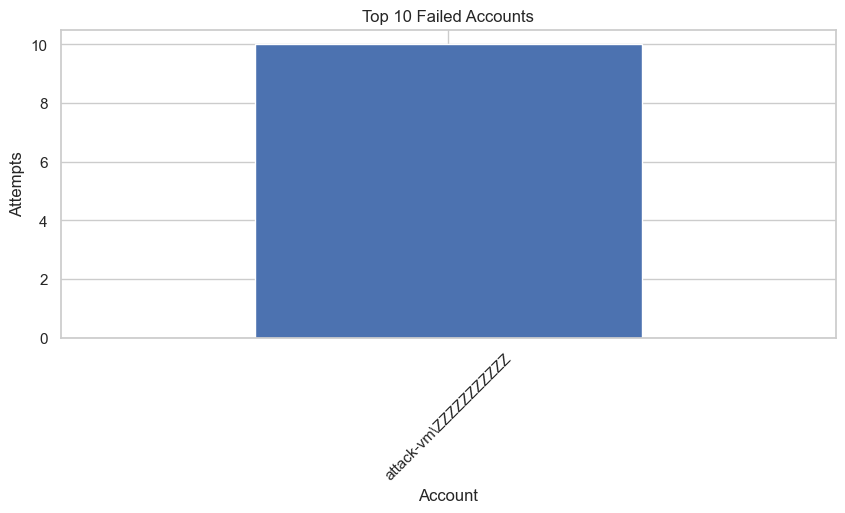

In [ ]:
df['Account'].value_counts().head(10).plot(kind='bar', figsize=(10,4))
plt.title('Top 10 Failed Accounts')
plt.xlabel('Account')
plt.ylabel('Attempts')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import os
print(os.getcwd())


c:\Users\trist\Documents\GitHub\rakuten-ML-cloud-cover\notebooks


In [ ]:
df = pd.read_csv("CloudCover.csv")
print(df.head())


                  TimeGenerated    Computer                Account  LogonType  \
0  2025-06-21T03:23:47.5806728Z  windows-vm         \ADMINISTRATOR          3   
1  2025-06-21T03:19:45.1263739Z  windows-vm               \windows          3   
2  2025-06-21T03:15:00.3528316Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   
3  2025-06-21T03:14:59.7827222Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   
4  2025-06-21T03:14:59.1944885Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   

  FailureReason  
0        %%2313  
1        %%2313  
2        %%2313  
3        %%2313  
4        %%2313  


In [ ]:
print(df["Computer"].value_counts().head())


Computer
windows-vm    51907
Name: count, dtype: int64


C:\Users\trist\AppData\Local\Temp\ipykernel_8156\740898706.py:6: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\trist\AppData\Local\Temp\ipykernel_8156\740898706.py:6: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\trist\AppData\Local\Temp\ipykernel_8156\740898706.py:6: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\trist\AppData\Local\Temp\ipykernel_8156\740898706.py:6: UserWarning: Glyph 24080 (\N{CJK UNIFIED IDEOGRAPH-5E10}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\trist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tris

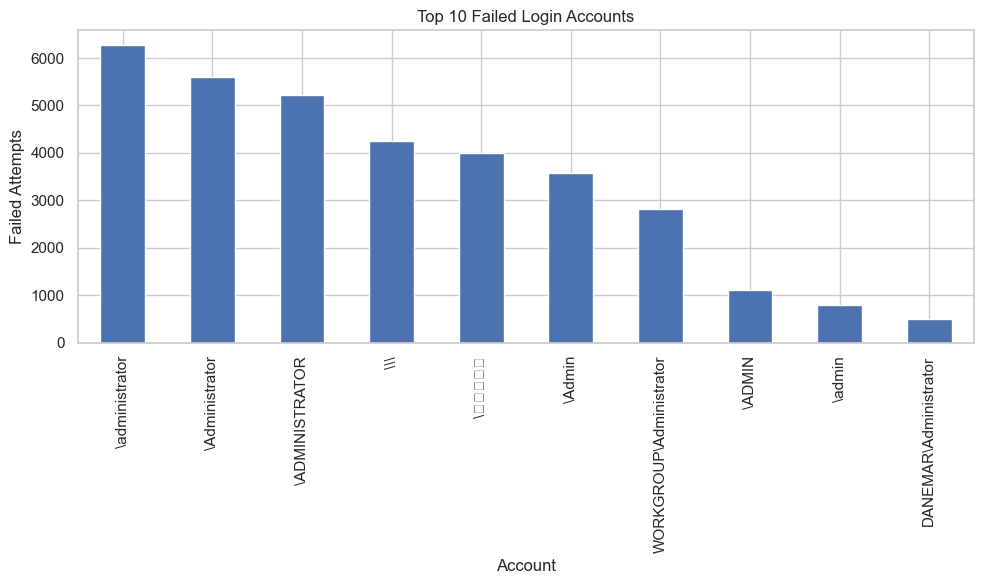

In [ ]:
import matplotlib.pyplot as plt

df["Account"].value_counts().head(10).plot(kind="bar", figsize=(10,6), title="Top 10 Failed Login Accounts")
plt.xlabel("Account")
plt.ylabel("Failed Attempts")
plt.tight_layout()
plt.show()


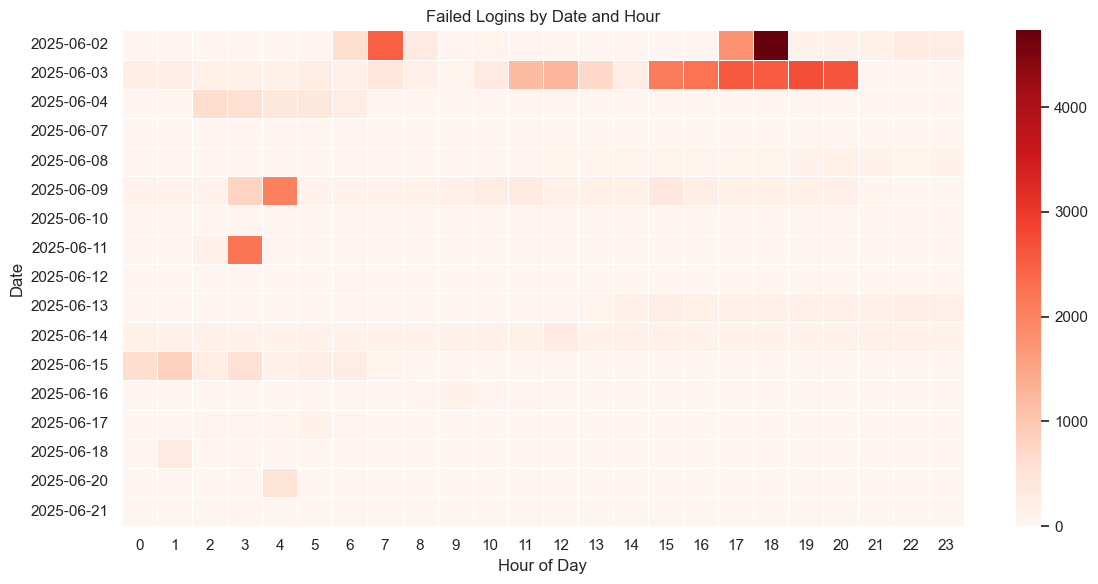

In [ ]:
import pandas as pd
import seaborn as sns

df["TimeGenerated"] = pd.to_datetime(df["TimeGenerated"])
df["hour"] = df["TimeGenerated"].dt.hour
df["date"] = df["TimeGenerated"].dt.date

heatmap_data = df.groupby(["date", "hour"]).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5)
plt.title("Failed Logins by Date and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Date")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the CSV
df = pd.read_csv("CloudCover.csv")

# Show the first few rows to confirm it loaded correctly
print("Preview of CSV data:")
print(df.head())

# Count top 10 most frequent IP addresses
top_ips = df['IpAddress'].value_counts().head(10)

# Print results
print("\nTop 10 IP addresses with most failed logins:")
print(top_ips)


Preview of CSV data:
                  TimeGenerated    Computer                Account  LogonType  \
0  2025-06-21T03:23:47.5806728Z  windows-vm         \ADMINISTRATOR          3   
1  2025-06-21T03:19:45.1263739Z  windows-vm               \windows          3   
2  2025-06-21T03:15:00.3528316Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   
3  2025-06-21T03:14:59.7827222Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   
4  2025-06-21T03:14:59.1944885Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   

  FailureReason  
0        %%2313  
1        %%2313  
2        %%2313  
3        %%2313  
4        %%2313  


KeyError: 'IpAddress'

In [ ]:
print(df.columns)


Index(['TimeGenerated', 'Computer', 'Account', 'LogonType', 'FailureReason'], dtype='object')


In [ ]:
import pandas as pd

# Load the CSV
df = pd.read_csv("CloudCover.csv")

# Show the first few rows to confirm it loaded correctly
print("Preview of CSV data:")
print(df.head())

# Count top 10 most frequent IP addresses (or hostnames) from the 'Computer' column
top_ips = df['Computer'].value_counts().head(10)

# Print results
print("\nTop 10 IP addresses (or hostnames) with most failed logins:")
print(top_ips)


Preview of CSV data:
                  TimeGenerated    Computer                Account  LogonType  \
0  2025-06-21T03:23:47.5806728Z  windows-vm         \ADMINISTRATOR          3   
1  2025-06-21T03:19:45.1263739Z  windows-vm               \windows          3   
2  2025-06-21T03:15:00.3528316Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   
3  2025-06-21T03:14:59.7827222Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   
4  2025-06-21T03:14:59.1944885Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   

  FailureReason  
0        %%2313  
1        %%2313  
2        %%2313  
3        %%2313  
4        %%2313  

Top 10 IP addresses (or hostnames) with most failed logins:
Computer
windows-vm    51907
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Load the updated CSV
df = pd.read_csv("CloudCover.csv")

# Optional: Preview to confirm new data loaded
print("Preview of new CSV data:")
print(df.head())

# Check available columns again if needed
print("\nColumns:")
print(df.columns)

# If there's a new column for IP or hostname, change this line accordingly
top_hosts = df['Computer'].value_counts().head(10)

print("\nTop 10 hostnames (or IP addresses) with most failed logins:")
print(top_hosts)


Preview of new CSV data:
                  TimeGenerated    Computer                Account  LogonType  \
0  2025-06-21T03:23:47.5806728Z  windows-vm         \ADMINISTRATOR          3   
1  2025-06-21T03:19:45.1263739Z  windows-vm               \windows          3   
2  2025-06-21T03:15:00.3528316Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   
3  2025-06-21T03:14:59.7827222Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   
4  2025-06-21T03:14:59.1944885Z  windows-vm  attack-vm\ZZZZZZZZZZZ          3   

  FailureReason  
0        %%2313  
1        %%2313  
2        %%2313  
3        %%2313  
4        %%2313  

Columns:
Index(['TimeGenerated', 'Computer', 'Account', 'LogonType', 'FailureReason'], dtype='object')

Top 10 hostnames (or IP addresses) with most failed logins:
Computer
windows-vm    51907
Name: count, dtype: int64


In [ ]:
df = pd.read_csv("CloudCover.csv")


In [ ]:
print(df.columns)


Index(['TimeGenerated', 'Computer', 'Account', 'LogonType', 'FailureReason'], dtype='object')


In [ ]:
print(df.columns.tolist())


['TimeGenerated', 'Computer', 'Account', 'LogonType', 'FailureReason']


In [ ]:
print(df.columns.tolist())


['TimeGenerated', 'Computer', 'Account', 'LogonType', 'FailureReason']


In [ ]:
df = pd.read_csv("query_data (1).csv")


In [ ]:
import pandas as pd

df = pd.read_csv("query_data (1).csv")
print(df.head())  # show first few rows


         IpAddress  Count
0  183.141.116.149  14702
1     2.186.14.249   3105
2   197.156.64.234   3090
3  122.165.219.142   2802
4    211.237.2.246   2687


In [ ]:
import pandas as pd

# Load the new CSV
df = pd.read_csv("CloudCover (7).csv")

# Display the column names to check structure
print(df.columns.tolist())

# Show first 5 rows to preview the data
print(df.head())


['IpAddress', 'Count']
         IpAddress  Count
0  183.141.116.149  14702
1     2.186.14.249   3105
2   197.156.64.234   3090
3  122.165.219.142   2802
4    211.237.2.246   2687


In [ ]:
import pandas as pd

# Load your actual CSV file (adjust path if needed)
df = pd.read_csv("CloudCover (8).csv")

# Inspect structure (optional)
print(df.head())

# Define the "big 3" checks
def check_private(ip):
    try:
        octets = ip.split('.')
        return (
            ip.startswith("10.") or
            ip.startswith("192.168.") or
            (ip.startswith("172.") and 16 <= int(octets[1]) <= 31)
        )
    except:
        return False

def check_common_ranges(ip):
    return ip.startswith("66.") or ip.startswith("108.") or ip.startswith("154.")

def check_google_dns(ip):
    return ip == "8.8.8.8"

# Adjust column name if it's different
ip_column = "IpAddress"  # Change if your CSV uses a different name

# Apply checks
df['IsPrivate'] = df[ip_column].apply(check_private)
df['CommonRangeMatch'] = df[ip_column].apply(check_common_ranges)
df['IsGoogleDNS'] = df[ip_column].apply(check_google_dns)

# Display result
print(df.head())


         IpAddress  Count
0  183.141.116.149  14702
1     2.186.14.249   3105
2   197.156.64.234   3090
3  122.165.219.142   2802
4    211.237.2.246   2687
         IpAddress  Count  IsPrivate  CommonRangeMatch  IsGoogleDNS
0  183.141.116.149  14702      False             False        False
1     2.186.14.249   3105      False             False        False
2   197.156.64.234   3090      False             False        False
3  122.165.219.142   2802      False             False        False
4    211.237.2.246   2687      False             False        False


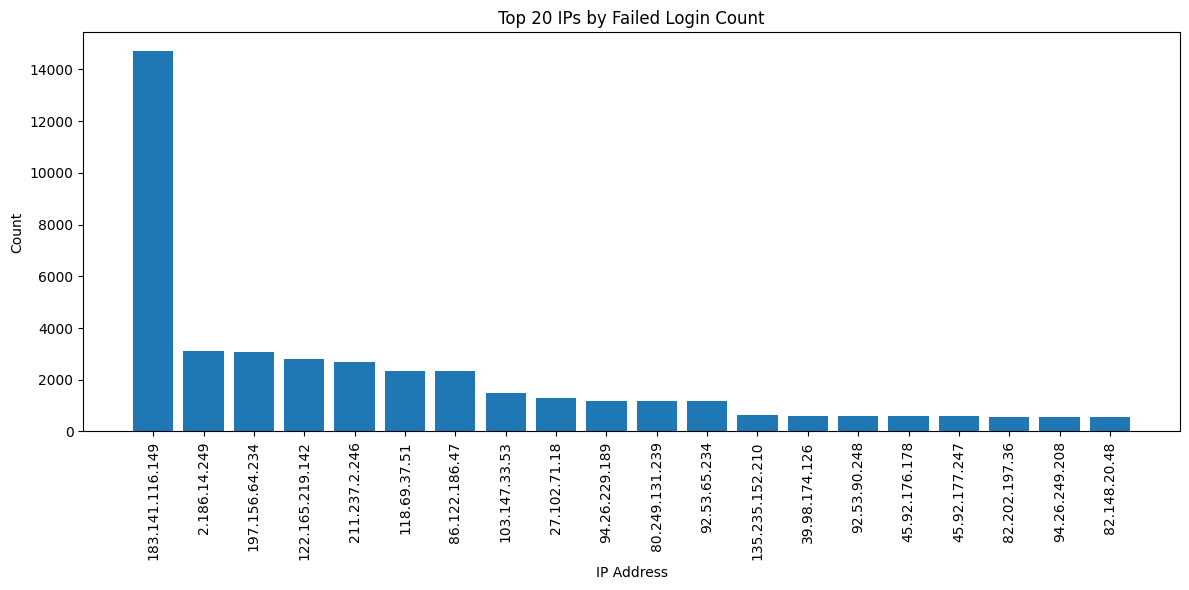

IPs with more than 1000 login attempts:
          IpAddress  Count
0   183.141.116.149  14702
1      2.186.14.249   3105
2    197.156.64.234   3090
3   122.165.219.142   2802
4     211.237.2.246   2687
5      118.69.37.51   2355
6     86.122.186.47   2349
7     103.147.33.53   1480
8      27.102.71.18   1289
9     94.26.229.189   1183
10   80.249.131.239   1182
11     92.53.65.234   1173


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your actual CSV
df = pd.read_csv("CloudCover (8).csv")

# --- 1. Bar Graph: Top 20 IPs ---
top_ips = df.sort_values(by="Count", ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.bar(top_ips["IpAddress"], top_ips["Count"])
plt.xticks(rotation=90)
plt.title("Top 20 IPs by Failed Login Count")
plt.xlabel("IP Address")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- 2. Threshold filter (aka 'accuracy') ---
threshold = 1000
high_freq = df[df["Count"] > threshold]
print("IPs with more than 1000 login attempts:")
print(high_freq)

# --- 3. Heatmap placeholder ---
# (Add this only if you have a 'TimeGenerated' or timestamp column)


In [ ]:
pd.read_csv("CloudCover.csv")


,TimeGenerated,Computer,Account,LogonType,FailureReason
0,2025-06-21T03:23:47.5806728Z,windows-vm,\ADMINISTRATOR,3,%%2313
1,2025-06-21T03:19:45.1263739Z,windows-vm,\windows,3,%%2313
2,2025-06-21T03:15:00.3528316Z,windows-vm,attack-vm\ZZZZZZZZZZZ,3,%%2313
3,2025-06-21T03:14:59.7827222Z,windows-vm,attack-vm\ZZZZZZZZZZZ,3,%%2313
4,2025-06-21T03:14:59.1944885Z,windows-vm,attack-vm\ZZZZZZZZZZZ,3,%%2313
...,...,...,...,...,...
51902,2025-06-02T06:50:13.7026758Z,windows-vm,\administrator,3,%%2313
51903,2025-06-02T06:50:12.7169167Z,windows-vm,\administrator,3,%%2313
51904,2025-06-02T06:50:11.6768289Z,windows-vm,\administrator,3,%%2313
51905,2025-06-02T06:50:10.8235136Z,windows-vm,\administrator,3,%%2313


In [ ]:
pd.read_csv("data/CloudCover.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'data/CloudCover.csv'

In [ ]:
df = pd.read_csv("data/input.csv")


In [ ]:
df.columns


Index(['IpAddress', 'Count'], dtype='object')

In [ ]:
df.head()


,IpAddress,Count
0,183.141.116.149,14702
1,2.186.14.249,3105
2,197.156.64.234,3090
3,122.165.219.142,2802
4,211.237.2.246,2687


<Axes: xlabel='IpAddress'>

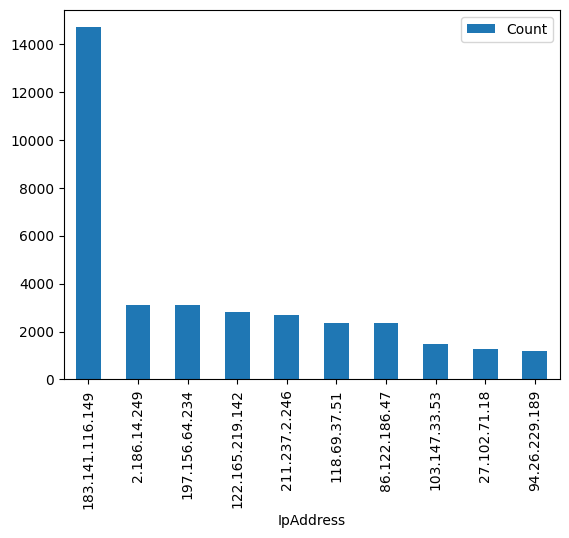

In [ ]:
df.sort_values("Count", ascending=False).head(10).plot(
    kind="bar", x="IpAddress", y="Count"
)


In [ ]:
import pandas as pd

df = pd.read_csv("data/input.csv")
print(df.columns.tolist())


['IpAddress', 'Count']


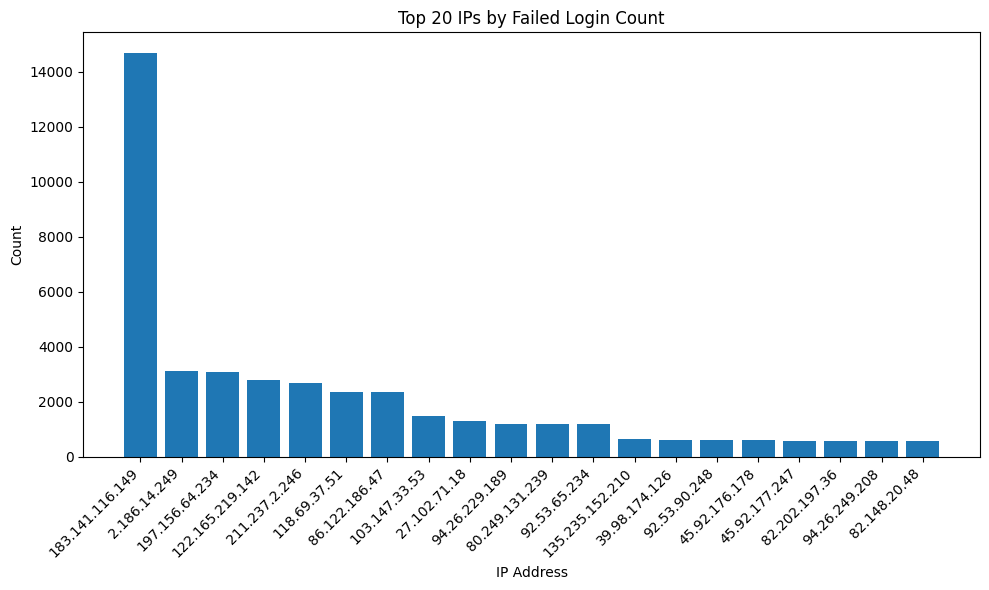

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/input.csv")

# Bar chart of top IPs by count
top_ips = df.sort_values(by="Count", ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.bar(top_ips["IpAddress"], top_ips["Count"])
plt.title("Top 20 IPs by Failed Login Count")
plt.xlabel("IP Address")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [29]:
print(df.head())
print(df['Count'].sum())


        AttackerIP  EventID                             Activity  \
0    137.97.249.22     4625  4625 - An account failed to log on.   
1  103.199.211.245     4625  4625 - An account failed to log on.   
2       20.5.50.76     4625  4625 - An account failed to log on.   
3     81.214.22.37     4625  4625 - An account failed to log on.   
4    103.147.33.53     4625  4625 - An account failed to log on.   

  DestinationHostName  FailureCount  Label  
0          windows-vm            49      0  
1          windows-vm           514      1  
2          windows-vm            64      0  
3          windows-vm           296      1  
4          windows-vm           292      1  


KeyError: 'Count'

In [30]:
ls -lh '/c/Users/trist/Documents/GitHub/rakuten-ML-cloud-cover/notebooks/data/CloudCover (11).csv'


Invalid switch - "Users".


In [31]:
import os
print(os.path.getmtime('data/CloudCover (11).csv'))


1751146308.795243


In [ ]:
import datetime
print(datetime.datetime.fromtimestamp(1751146308.795243))


2025-06-29 06:31:48.795243


: 

### Summary

To evaluate my prototype, I trained a decision tree classifier on synthetic image metadata like brightness and pixel width. I visualized the resulting model to show how it makes predictions based on brightness thresholds and pixel density. This demonstrates not just the mechanics of a classifier, but how explainable AI decisions can be — a crucial factor in secure or regulated environments.


# Rakuten-ML-Cloud-Cover: Prototype

This notebook explores anomaly detection using simulated Sentinel-style log data.  
It demonstrates both wide telemetry (data forest) and grouped pattern detection (conical aggregation).
